In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
data = pd.read_csv('Group_9_data_cleaned.csv')
data.head(3)

,Unnamed: 0,current_1,current_2,current_3,current_4,current_5,current_6,current_7,current_8,current_9,...,current_40,current_41,current_42,current_43,current_44,current_45,current_46,current_47,current_48,output
0,0,-3.014600e-07,0.000008,-0.000012,-0.000002,-0.000001,-0.000021,0.031718,0.03171,0.031721,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,1,2.913200e-06,-0.000005,0.000003,-0.000006,0.000003,-0.000004,0.030804,0.03081,0.030806,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,2,-2.951700e-06,-0.000003,-0.000016,-0.000001,-0.000002,0.000017,0.032877,0.03288,0.032896,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1


In [4]:
# Renamed the columns from 0,1,2,3... to current_1,current_2...to make sense

In [5]:
data.columns

Index(['Unnamed: 0', 'current_1', 'current_2', 'current_3', 'current_4',
       'current_5', 'current_6', 'current_7', 'current_8', 'current_9',
       'current_10', 'current_11', 'current_12', 'current_13', 'current_14',
       'current_15', 'current_16', 'current_17', 'current_18', 'current_19',
       'current_20', 'current_21', 'current_22', 'current_23', 'current_24',
       'current_25', 'current_26', 'current_27', 'current_28', 'current_29',
       'current_30', 'current_31', 'current_32', 'current_33', 'current_34',
       'current_35', 'current_36', 'current_37', 'current_38', 'current_39',
       'current_40', 'current_41', 'current_42', 'current_43', 'current_44',
       'current_45', 'current_46', 'current_47', 'current_48', 'output'],
      dtype='object')

In [6]:
# removing a redundant column
df = data.drop(['Unnamed: 0'],axis=1)
df.head()

,current_1,current_2,current_3,current_4,current_5,current_6,current_7,current_8,current_9,current_10,...,current_40,current_41,current_42,current_43,current_44,current_45,current_46,current_47,current_48,output
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1


In [7]:
df.shape

(58509, 49)

In [8]:
df.describe()

,current_1,current_2,current_3,current_4,current_5,current_6,current_7,current_8,current_9,current_10,...,current_40,current_41,current_42,current_43,current_44,current_45,current_46,current_47,current_48,output
count,58509.000000,5.850900e+04,5.850900e+04,5.850900e+04,5.850900e+04,5.850900e+04,58509.000000,58509.000000,58509.000000,58509.000000,...,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000
mean,-0.000003,1.756436e-06,1.111802e-06,-9.722586e-07,1.775487e-06,-7.457535e-07,0.002854,0.002849,0.002849,-0.006349,...,-0.650427,5.730645,7.702923,-1.500891,-1.500915,-1.500809,-1.497787,-1.497814,-1.497710,6.000000
std,0.000008,3.199783e-05,1.520782e-04,7.956279e-06,3.234750e-05,1.490893e-04,0.033692,0.033700,0.033701,0.050735,...,0.100670,5.781169,4.347205,0.003629,0.003640,0.003600,0.003002,0.002984,0.002988,3.162305
min,-0.000021,-6.427550e-05,-2.937900e-04,-1.887580e-05,-6.547550e-05,-2.915565e-04,-0.086972,-0.087041,-0.086978,-0.111281,...,-0.902350,-0.596830,0.320660,-1.510950,-1.511200,-1.510700,-1.504700,-1.504550,-1.504450,1.000000
25%,-0.000007,-1.444400e-05,-7.239600e-05,-5.417500e-06,-1.475300e-05,-7.379100e-05,-0.019927,-0.019951,-0.019925,-0.032144,...,-0.715470,1.450300,4.436300,-1.503300,-1.503400,-1.503200,-1.499600,-1.499600,-1.499500,3.000000
50%,-0.000003,8.804600e-07,5.137700e-07,-1.059100e-06,7.540200e-07,-1.659300e-07,0.013226,0.013230,0.013247,-0.015566,...,-0.661710,3.301300,6.479100,-1.500300,-1.500300,-1.500300,-1.498100,-1.498100,-1.498000,6.000000
75%,0.000002,1.877700e-05,7.520000e-05,3.554700e-06,1.906200e-05,7.138600e-05,0.024770,0.024776,0.024777,0.020614,...,-0.573980,8.288500,9.857500,-1.498200,-1.498200,-1.498200,-1.496200,-1.496300,-1.496200,9.000000
max,0.000015,6.860850e-05,2.965940e-04,1.701300e-05,6.978450e-05,2.891515e-04,0.069125,0.069130,0.069131,0.099751,...,-0.361745,18.545800,17.989300,-1.490550,-1.490400,-1.490700,-1.491100,-1.491350,-1.491250,11.000000


In [9]:
#The correlation between the features 
df.corr()

,current_1,current_2,current_3,current_4,current_5,current_6,current_7,current_8,current_9,current_10,...,current_40,current_41,current_42,current_43,current_44,current_45,current_46,current_47,current_48,output
current_1,1.000000,0.200945,0.063012,0.037390,0.153947,0.031156,0.292957,0.292767,0.292229,0.306995,...,0.021246,0.024487,0.007712,-0.015295,-0.015186,-0.016272,-0.029545,-0.028904,-0.029091,-0.202667
current_2,0.200945,1.000000,0.091577,0.038238,0.263045,0.036575,0.035447,0.034374,0.033743,0.048057,...,-0.042636,-0.008950,-0.010151,-0.045023,-0.044975,-0.044491,-0.003200,-0.003226,-0.002257,-0.163629
current_3,0.063012,0.091577,1.000000,0.043177,0.077754,0.015193,-0.019069,-0.019158,-0.025016,-0.005571,...,0.005621,-0.000410,0.000691,-0.016704,-0.016751,-0.016587,0.005015,0.005105,0.005461,-0.031782
current_4,0.037390,0.038238,0.043177,1.000000,0.172129,0.070489,-0.109967,-0.110037,-0.110391,-0.019887,...,0.003364,-0.006430,-0.008408,0.028995,0.028610,0.029370,-0.054257,-0.054493,-0.052875,0.029793
current_5,0.153947,0.263045,0.077754,0.172129,1.000000,0.102199,0.003371,0.003153,0.002597,0.039671,...,-0.034406,-0.020487,-0.019344,-0.026758,-0.027167,-0.026253,-0.027278,-0.027553,-0.025342,-0.173460
current_6,0.031156,0.036575,0.015193,0.070489,0.102199,1.000000,-0.005976,-0.006020,-0.006151,0.000228,...,-0.003348,0.002980,-0.001444,0.007793,0.007605,0.007781,-0.016812,-0.016625,-0.016499,-0.034695
current_7,0.292957,0.035447,-0.019069,-0.109967,0.003371,-0.005976,1.000000,0.999999,0.999975,0.770270,...,-0.020317,0.016032,0.010536,-0.072783,-0.072576,-0.074704,-0.003811,-0.003167,-0.003228,-0.396999
current_8,0.292767,0.034374,-0.019158,-0.110037,0.003153,-0.006020,0.999999,1.000000,0.999978,0.770250,...,-0.020262,0.016074,0.010563,-0.072778,-0.072572,-0.074706,-0.003781,-0.003136,-0.003198,-0.396906
current_9,0.292229,0.033743,-0.025016,-0.110391,0.002597,-0.006151,0.999975,0.999978,1.000000,0.770155,...,-0.020275,0.016095,0.010566,-0.072619,-0.072415,-0.074554,-0.003761,-0.003118,-0.003182,-0.396581
current_10,0.306995,0.048057,-0.005571,-0.019887,0.039671,0.000228,0.770270,0.770250,0.770155,1.000000,...,-0.030968,-0.013005,-0.008102,-0.057480,-0.057656,-0.059225,-0.024902,-0.024494,-0.024265,-0.259591


In [10]:
# The output variable has 11 different classes 
df['output'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [11]:
# It is a balanced dataset with equal number of classes.
df['output'].value_counts()

1     5319
2     5319
3     5319
4     5319
5     5319
6     5319
7     5319
8     5319
9     5319
10    5319
11    5319
Name: output, dtype: int64

# classification- decision trees

In [12]:
X = df.drop(['output'],axis=1)
y = df['output']


In [13]:
# There is no scaling is required as it is a decision tree model.


In [14]:
# importing decision tree libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [15]:
# dividing the dataset into train,test and validation sets
X_train, X_rem, y_train, y_rem  = train_test_split(X, y, train_size = 0.5, random_state = 42)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 42)

In [16]:
# The shape of training dataset
print(f" The input training  data shape is {X_train.shape}")
print(f" The  output training data shape is {y_train.shape}")

 The input training  data shape is (29254, 48)
 The  output training data shape is (29254,)


In [17]:
# The shape of validation dataset
print(f" The input validation  data shape is {X_valid.shape}")
print(f" The  output validation data shape is {y_valid.shape}")

 The input validation  data shape is (14627, 48)
 The  output validation data shape is (14627,)


In [18]:
# The shape of the test dataset 
print(f" The input testing  data shape is {X_valid.shape}")
print(f" The  output testing data shape is {y_valid.shape}")

 The input testing  data shape is (14627, 48)
 The  output testing data shape is (14627,)


In [19]:
# selecting a random model 
model_r = tree.DecisionTreeClassifier()
model_r.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
# accuracy scores on the three datasets
print(f" Random model training score is {model_r.score(X_train,y_train)}")
print(f" Random model validation data score is {model_r.score(X_valid,y_valid)}")
print(f" Random model testing score is {model_r.score(X_test,y_test)}")

 Random model training score is 1.0
 Random model validation data score is 0.9796950844328981
 Random model testing score is 0.9795597484276729


In [21]:
# classification report for validation dataset
y_pred_va = model_r.predict(X_valid)
print(classification_report(y_pred_va,y_valid))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      1349
           2       0.97      0.97      0.97      1336
           3       0.99      0.98      0.99      1312
           4       0.99      0.99      0.99      1294
           5       0.95      0.96      0.95      1285
           6       0.97      0.98      0.97      1325
           7       1.00      1.00      1.00      1396
           8       0.97      0.96      0.96      1346
           9       0.98      0.98      0.98      1315
          10       0.98      0.97      0.97      1311
          11       1.00      1.00      1.00      1358

    accuracy                           0.98     14627
   macro avg       0.98      0.98      0.98     14627
weighted avg       0.98      0.98      0.98     14627



### how accuracy changing with max-depth of the tree using gini-index 

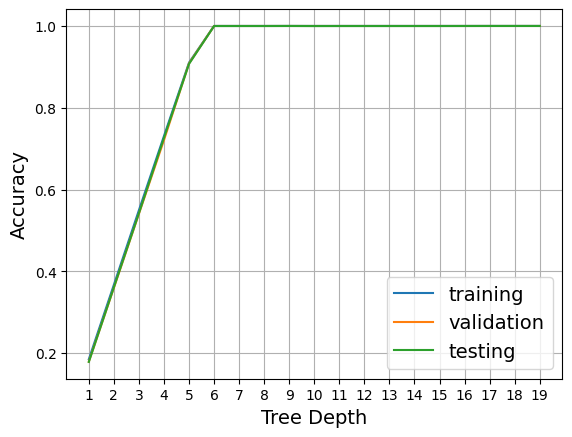

In [35]:
max_depth = []
acc_train = []
acc_valid = []
acc_test = []

for i in range(1, 20):
    tree_model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=i)
    tree_model.fit(X_train, y_train)
    acc_train.append(tree_model.score(X_train, y_train))
    acc_valid.append(tree_model.score(X_valid,y_valid))
    acc_test.append(tree_model.score(X_test, y_test))
    
    max_depth.append(i)

d = pd.DataFrame({'max_depth' : max_depth,
                  'acc_train': acc_train,
                  'acc_valid': acc_valid, 
                  'acc_test': acc_test})

plt.plot(d.max_depth, d.acc_train, label='training')
plt.plot(d.max_depth,d.acc_valid,label='validation')
plt.plot(d.max_depth, d.acc_test, label='testing')
plt.xlabel('Tree Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(max_depth)
plt.grid()
plt.legend(fontsize=14);

In [ ]:
# This is a balanced multiclass problem with each output class having same number of lables
# computing roc-auc score gives the differentiation between different class labels how they are predicted.

### how the area unde the roc curve changing with the maximum depth feature 

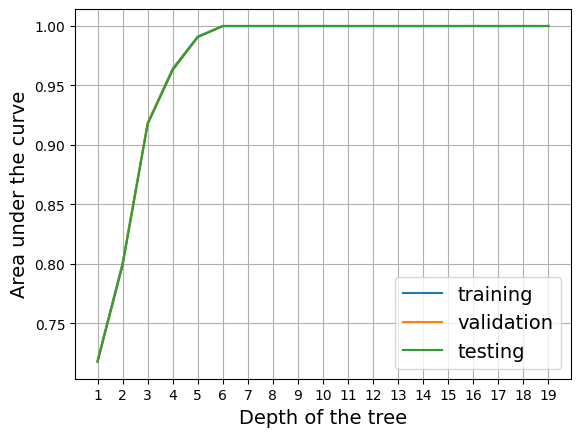

In [42]:
from sklearn.metrics import roc_auc_score
max_depth = []
auroc_train = []
auroc_valid = []
auroc_test = []


for i in range(1, 20):
    tree_model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=i)
    tree_model.fit(X_train, y_train)    
    y_pred_prob_train =  tree_model.predict_proba(X_train)
    roc_train = roc_auc_score( y_train, y_pred_prob_train, average="weighted", multi_class="ovr")
    auroc_train.append(roc_train)
    y_pred_prob_valid =  tree_model.predict_proba(X_valid)
    roc_valid = roc_auc_score( y_valid, y_pred_prob_valid, average="weighted", multi_class="ovr")
    auroc_valid.append(roc_valid)
    y_pred_prob_test =  tree_model.predict_proba(X_test)
    roc_test = roc_auc_score( y_test, y_pred_prob_test, average="weighted", multi_class="ovr")
    auroc_test.append(roc_test)    
    max_depth.append(i)

d = pd.DataFrame({'max_depth' : max_depth,
                  'auroc_train': auroc_train,
                  'auroc_valid': auroc_valid, 
                  'auroc_test': auroc_test})

plt.plot(d.max_depth, d.auroc_train, label='training')
plt.plot(d.max_depth,d.auroc_valid,label='validation')
plt.plot(d.max_depth, d.auroc_test, label='testing')
plt.xlabel('', fontsize=14)
plt.ylabel('Area under the curve', fontsize=14)
plt.xticks(max_depth)
plt.grid()
plt.legend(fontsize=14);

### Finding best model using hyperparameter validation


In [52]:
from sklearn.model_selection import GridSearchCV

gs_model = GridSearchCV(estimator = tree.DecisionTreeClassifier(), 
                 param_grid={'max_depth': range(1, 25),
                             'min_samples_split': range(2, 25),
                             'criterion': ['gini', 'entropy']},
                 cv=5,
                 scoring=("accuracy"))
gs_model.fit(X_valid,y_valid)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 25),
                         'min_samples_split': range(2, 25)},
             scoring='accuracy')

In [53]:
gs_model.best_params_

{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 8}

In [24]:
# best classification tree for the above data
best_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=11, min_samples_split = 8)
best_tree.fit(X_train,y_train)
filename = 'Tree_class.sav'
pickle.dump(best_tree, open(filename, 'wb'))

### results  

#### Accuracy of the models 

In [25]:
# Best model training 
best_tree.fit(X_train,y_train)
# Accuracy scores of best tree on different datasets
y_train_pred = best_tree.predict(X_train)
print(f" The training data accuracy for the best model is {accuracy_score(y_train,y_train_pred)}")
y_valid_pred = best_tree.predict(X_valid) 
print(f" The validation data accuracy for the best model is {accuracy_score(y_valid,y_valid_pred)}")
y_test_pred = best_tree.predict(X_test)
print(f" The testing data accuracy for the best model is {accuracy_score(y_test,y_test_pred)}")
      

 The training data accuracy for the best model is 1.0
 The validation data accuracy for the best model is 0.9998632665618377
 The testing data accuracy for the best model is 0.9997265518184304


### Confusion matrix of the models  

In [27]:
# confusion matrix for training data
print(confusion_matrix(y_train,y_train_pred))

[[2643    0    0    0    0    0    0    0    0    0    0]
 [   0 2623    0    0    0    0    0    0    0    0    0]
 [   0    0 2685    0    0    0    0    0    0    0    0]
 [   0    0    0 2679    0    0    0    0    0    0    0]
 [   0    0    0    0 2716    0    0    0    0    0    0]
 [   0    0    0    0    0 2626    0    0    0    0    0]
 [   0    0    0    0    0    0 2609    0    0    0    0]
 [   0    0    0    0    0    0    0 2665    0    0    0]
 [   0    0    0    0    0    0    0    0 2693    0    0]
 [   0    0    0    0    0    0    0    0    0 2663    0]
 [   0    0    0    0    0    0    0    0    0    0 2652]]


In [28]:
# confusion matrix for validation data
print(confusion_matrix(y_valid,y_valid_pred))

[[1345    0    0    0    0    0    0    0    0    0    0]
 [   0 1339    0    0    0    0    0    0    0    0    0]
 [   0    0 1293    0    0    0    0    0    0    0    0]
 [   0    0    0 1299    0    0    0    0    0    0    0]
 [   0    0    0    0 1305    0    0    0    0    0    0]
 [   0    0    0    0    0 1337    0    0    0    0    0]
 [   0    0    0    0    0    0 1396    0    0    0    0]
 [   0    0    0    0    0    0    0 1335    0    0    0]
 [   0    0    0    0    0    0    0    0 1314    0    0]
 [   0    0    0    0    0    0    0    0    2 1306    0]
 [   0    0    0    0    0    0    0    0    0    0 1356]]


In [29]:
# confusion matrix for testing data
print(confusion_matrix(y_test,y_test_pred))

[[1331    0    0    0    0    0    0    0    0    0    0]
 [   2 1355    0    0    0    0    0    0    0    0    0]
 [   0    0 1340    1    0    0    0    0    0    0    0]
 [   0    0    0 1341    0    0    0    0    0    0    0]
 [   0    0    0    0 1298    0    0    0    0    0    0]
 [   0    0    0    0    0 1356    0    0    0    0    0]
 [   0    0    0    0    0    0 1314    0    0    0    0]
 [   0    0    0    0    0    0    0 1319    0    0    0]
 [   0    0    0    0    0    0    0    0 1312    0    0]
 [   0    0    0    0    0    0    0    0    1 1347    0]
 [   0    0    0    0    0    0    0    0    0    0 1311]]


### classification report of the models

In [30]:
# classification report for the training data
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2643
           2       1.00      1.00      1.00      2623
           3       1.00      1.00      1.00      2685
           4       1.00      1.00      1.00      2679
           5       1.00      1.00      1.00      2716
           6       1.00      1.00      1.00      2626
           7       1.00      1.00      1.00      2609
           8       1.00      1.00      1.00      2665
           9       1.00      1.00      1.00      2693
          10       1.00      1.00      1.00      2663
          11       1.00      1.00      1.00      2652

    accuracy                           1.00     29254
   macro avg       1.00      1.00      1.00     29254
weighted avg       1.00      1.00      1.00     29254



In [31]:
# classification report for the validation data
print(classification_report(y_valid,y_valid_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1345
           2       1.00      1.00      1.00      1339
           3       1.00      1.00      1.00      1293
           4       1.00      1.00      1.00      1299
           5       1.00      1.00      1.00      1305
           6       1.00      1.00      1.00      1337
           7       1.00      1.00      1.00      1396
           8       1.00      1.00      1.00      1335
           9       1.00      1.00      1.00      1314
          10       1.00      1.00      1.00      1308
          11       1.00      1.00      1.00      1356

    accuracy                           1.00     14627
   macro avg       1.00      1.00      1.00     14627
weighted avg       1.00      1.00      1.00     14627



In [32]:
# classification report for the testing data
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1331
           2       1.00      1.00      1.00      1357
           3       1.00      1.00      1.00      1341
           4       1.00      1.00      1.00      1341
           5       1.00      1.00      1.00      1298
           6       1.00      1.00      1.00      1356
           7       1.00      1.00      1.00      1314
           8       1.00      1.00      1.00      1319
           9       1.00      1.00      1.00      1312
          10       1.00      1.00      1.00      1348
          11       1.00      1.00      1.00      1311

    accuracy                           1.00     14628
   macro avg       1.00      1.00      1.00     14628
weighted avg       1.00      1.00      1.00     14628



### ROC_AUC score of the models 

In [45]:
# roc auc score for training data
y_train_prob = best_tree.predict_proba(X_train)
print(f" The roc_auc score for the training data is {roc_auc_score(y_train,y_train_prob,average='weighted',multi_class='ovr')}")
# roc auc score for the validation data
y_valid_prob = best_tree.predict_proba(X_valid)
print(f" The roc_auc score for the validation data is {roc_auc_score(y_valid,y_valid_prob,average='weighted',multi_class='ovr')}")
# roc auc score for the testing data
y_test_prob = best_tree.predict_proba(X_test)
print(f" The roc_auc score for the testing data is {roc_auc_score(y_test,y_test_prob,average='weighted',multi_class='ovr')}")

 The roc_auc score for the training data is 1.0
 The roc_auc score for the validation data is 0.9999248854503117
 The roc_auc score for the testing data is 0.9998496154861838


In [ ]:
# The more the roc auc score the better the models differntiating between each class labels.

### Recall score of the models 

In [50]:
# recall score for training data
print(f" The recall score for the training data is {recall_score(y_train,y_train_pred,average= 'macro')}")
# recall score for validation data
print(f" The recall score for the validation data is {recall_score(y_valid,y_valid_pred,average= 'macro')}")
# recall score for test data
print(f" The recall score for the testing data is {recall_score(y_valid,y_valid_pred,average= 'macro')}")

 The recall score for the training data is 1.0
 The recall score for the validation data is 0.9998609952738394
 The recall score for the testing data is 0.9998609952738394


### F-1 score of the models

In [52]:
# F-1 score for training data
print(f" The f-1 score for the training data is {f1_score(y_train,y_train_pred,average= 'weighted')}")
# F-1 score for validation data
print(f" The f-1 score for the validation data is {f1_score(y_valid,y_valid_pred,average= 'weighted')}")
# F-1 score for test data
print(f" The f-1 score for the testing data is {f1_score(y_valid,y_valid_pred,average= 'weighted')}")

 The f-1 score for the training data is 1.0
 The f-1 score for the validation data is 0.9998632662436134
 The f-1 score for the testing data is 0.9998632662436134
